In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("preprocessed_data.csv")
df.head()

,Unnamed: 0,num__math score,num__reading score,num__writing score,cat__gender_male,cat__race/ethnicity_group B,cat__race/ethnicity_group C,cat__race/ethnicity_group D,cat__race/ethnicity_group E,cat__parental level of education_bachelor's degree,cat__parental level of education_high school,cat__parental level of education_master's degree,cat__parental level of education_some college,cat__parental level of education_some high school,cat__lunch_standard,cat__test preparation course_none
0,0,0.390024,0.193999,0.391492,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,0.192076,1.427476,1.313269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,1.577711,1.770109,1.642475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,3,-1.259543,-0.833899,-1.583744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.653954,0.605158,0.457333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [3]:
df=df.drop(columns='Unnamed: 0')
df.head()

,num__math score,num__reading score,num__writing score,cat__gender_male,cat__race/ethnicity_group B,cat__race/ethnicity_group C,cat__race/ethnicity_group D,cat__race/ethnicity_group E,cat__parental level of education_bachelor's degree,cat__parental level of education_high school,cat__parental level of education_master's degree,cat__parental level of education_some college,cat__parental level of education_some high school,cat__lunch_standard,cat__test preparation course_none
0,0.390024,0.193999,0.391492,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.192076,1.427476,1.313269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.577711,1.770109,1.642475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-1.259543,-0.833899,-1.583744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.653954,0.605158,0.457333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [4]:
X=df.drop(['num__math score'], axis=1)
y=df['num__math score']
X,y

(     num__reading score  num__writing score  cat__gender_male  \
 0              0.193999            0.391492               0.0   
 1              1.427476            1.313269               0.0   
 2              1.770109            1.642475               0.0   
 3             -0.833899           -1.583744               1.0   
 4              0.605158            0.457333               1.0   
 ..                  ...                 ...               ...   
 995            2.044215            1.774157               0.0   
 996           -0.970952           -0.859491               1.0   
 997            0.125472           -0.201079               0.0   
 998            0.605158            0.589015               0.0   
 999            1.153370            1.181586               0.0   
 
      cat__race/ethnicity_group B  cat__race/ethnicity_group C  \
 0                            1.0                          0.0   
 1                            0.0                          1.0   
 2      

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [8]:
def evaluate_model(true, pred):
    r2=r2_score(true, pred)
    mae=mean_absolute_error(true, pred)
    mse=mean_squared_error(true, pred)
    return r2, mae, mse

In [9]:
models={
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(), 
    "Lasso Regression": Lasso(), 
    "ElasticNet Regression": ElasticNet(), 
    "K Neighbours": KNeighborsRegressor(),
    "Decision Trees": DecisionTreeRegressor(),
    "Random Forests": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "XG Boost": XGBRegressor()
}

In [10]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_pred_r2, model_train_pred_mse, model_train_pred_mae= evaluate_model(y_train, y_train_pred)
    model_test_pred_r2, model_test_pred_mse, model_test_pred_mae= evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])

    print("Train data performance")
    print("----------------------")
    print("- R2 score: {:.2f}".format(model_train_pred_r2))
    print("- MSE: {:.2f}".format(model_train_pred_mse))
    print("- MAE: {:.2f}".format(model_train_pred_mae))
        
    print("Train data performance")
    print("----------------------")
    print("- R2 score: {:.2f}".format(model_test_pred_r2))
    print("- MSE: {:.2f}".format(model_test_pred_mse))
    print("- MAE: {:.2f}".format(model_test_pred_mae))
    print("\n")

Linear Regression
Train data performance
----------------------
- R2 score: 0.87
- MSE: 0.28
- MAE: 0.12
Train data performance
----------------------
- R2 score: 0.88
- MSE: 0.28
- MAE: 0.13


Ridge Regression
Train data performance
----------------------
- R2 score: 0.87
- MSE: 0.28
- MAE: 0.12
Train data performance
----------------------
- R2 score: 0.88
- MSE: 0.28
- MAE: 0.13


Lasso Regression
Train data performance
----------------------
- R2 score: 0.00
- MSE: 0.79
- MAE: 0.98
Train data performance
----------------------
- R2 score: -0.02
- MSE: 0.81
- MAE: 1.08


ElasticNet Regression
Train data performance
----------------------
- R2 score: 0.34
- MSE: 0.64
- MAE: 0.65
Train data performance
----------------------
- R2 score: 0.33
- MSE: 0.67
- MAE: 0.71


K Neighbours
Train data performance
----------------------
- R2 score: 0.86
- MSE: 0.29
- MAE: 0.13
Train data performance
----------------------
- R2 score: 0.78
- MSE: 0.38
- MAE: 0.24


Decision Trees
Train data perfor

| **Model** | **Train R2** | **Test R2** | **Notes** |
|-----------|-----------|----------|-------|
| **_Linear_** | 0.87 | 0.88 | Good model. Generalises well. |
| **_Ridge_** | 0.87 | 0.88 | Good model. Generalises well. |
| **_Lasso_** | 0.0 | -0.02 | Model is overregularizing. |
| **_ElasticNet_** | 0.34 | 0.33 | Weak model. |
| **_KNN_** | 0.86 | 0.78 | Good model. Slight overfit. |
| **_Decision tree_** | 1.00 | 0.72 | Overfitting. |
| **_Random forest_** | 0.98 | 0.85 | Strong performance. |
| **_Gradient boosting_** | 0.90 | 0.87 | Good model.|
| **_AdaBoost_** | 0.85 | 0.85 | Good model. |
|**_XGBoost_** | 1.00 | 0.82 | Overfitting |

## Hyperparameter tuning

We will first do RandomizedSearchCV and once we get the narrow optimal range will refine hyperparameters with GridSearchCV.

We will not include:
1. Linear regression cannot be improved using hyperparameter tuning.
2. Lasso & elastic net are weak in the default mode.

In [15]:
from sklearn.model_selection import RandomizedSearchCV

ridge_params= {'alpha':[5,10,15,20]}
knn_params= {'n_neighbors':[5,10,15,20,30], 
            'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
            'p': [1,2,3]}
decision_params={'criterion': ["squared_error", "friedman_mse", "absolute_error", "poison"],
                 'splitter': ['best', 'random'],
                 'max_depth': [1,2,3,4,5,10,15,20,25],
                 'max_features': ["auto", "sqrt", "log2"]}
rf_params={'n_estimators': [100,150,200,250,300],
           'criterion': ["squared_error", "absolute_error", "friedman_mse", "poison"],
           'max_depth': [None,1,2,3,4,5,10,15,20,25],
           'min_samples_split': [2,5,10,15,20,25],
           'min_samples_leaf': [2,5,10,15,20,25],
           'max_features': ['auto', 1,2,5,10,15,20,25]}
grad_params={'loss': ["squared_error", "absolute_error", "huber", "quantile"],
             'learning_rate': [0.1, 0.5, 0.7, 1],
             'n_estimators': [100,150,200,250,300],
             'criterion': ["squared_error", "friedman_mse"],
             'max_depth': [None,1,2,3,4,5,10,15,20,25],
             'min_samples_split': [2,5,10,15,20,25],
             'min_samples_leaf': [2,5,10,15,20,25],
             'max_features': ['auto', 1,2,5,10,15,20,25]}
ada_params={'loss': ["linear", "square", "exponential"],
             'learning_rate': [0.1, 0.5, 0.7, 1],
             'n_estimators': [100,150,200,250,300]}
xg_params={'learning_rate': [0.1, 0.5, 0.7, 1],
           'max_depth': [None,1,2,3,4,5,10,15,20,25]}

In [16]:
randomcv_models=[
    ('Ridge', Ridge(), ridge_params),
    ('KNN', KNeighborsRegressor(), knn_params),
    ('Decision tree', DecisionTreeRegressor(), decision_params),
    ('Random forest', RandomForestRegressor(),rf_params),
    ('Grad boost', GradientBoostingRegressor(), grad_params),
    ('Ada boost', AdaBoostRegressor(), ada_params),
    ('XG boost', XGBRegressor(), xg_params)]

In [19]:
param_models={}
for name, model, params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                       param_distributions=params,
                       cv=3,
                       n_jobs=-1,
                       n_iter=50)
    random.fit(X_train, y_train)
    param_models[name]=random.best_params_

for model_name in param_models:
    print(f"Best parameters in {model_name}")
    print(param_models[model_name])

Best parameters in Ridge
{'alpha': 5}
Best parameters in KNN
{'p': 2, 'n_neighbors': 5, 'algorithm': 'ball_tree'}
Best parameters in Decision tree
{'splitter': 'best', 'max_features': 'log2', 'max_depth': 25, 'criterion': 'absolute_error'}
Best parameters in Random forest
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 10, 'criterion': 'absolute_error'}
Best parameters in Grad boost
{'n_estimators': 250, 'min_samples_split': 25, 'min_samples_leaf': 10, 'max_features': 25, 'max_depth': 1, 'loss': 'squared_error', 'learning_rate': 0.1, 'criterion': 'squared_error'}
Best parameters in Ada boost
{'n_estimators': 250, 'loss': 'linear', 'learning_rate': 1}
Best parameters in XG boost
{'max_depth': 2, 'learning_rate': 0.1}


In [23]:
models={
    "Ridge Regression": Ridge(alpha=5), 
    "K Neighbours": KNeighborsRegressor(p=2, n_neighbors=5, algorithm='ball_tree'),
    "Decision Trees": DecisionTreeRegressor(splitter='best', max_features='log2', max_depth=25, criterion='absolute_error'),
    "Random Forests": RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=10, max_depth=10, criterion='absolute_error'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=250, min_samples_split=25, min_samples_leaf=10, max_features=25, max_depth=1, loss='squared_error', learning_rate=0.1),
    "Ada Boost": AdaBoostRegressor(n_estimators=250, loss='linear', learning_rate=1),
    "XG Boost": XGBRegressor(max_depth=2, learning_rate=0.1)
}

In [25]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_pred_r2, model_train_pred_mse, model_train_pred_mae= evaluate_model(y_train, y_train_pred)
    model_test_pred_r2, model_test_pred_mse, model_test_pred_mae= evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])

    print("Train data performance")
    print("----------------------")
    print("- R2 score: {:.2f}".format(model_train_pred_r2))
    print("- MSE: {:.2f}".format(model_train_pred_mse))
    print("- MAE: {:.2f}".format(model_train_pred_mae))
        
    print("Train data performance")
    print("----------------------")
    print("- R2 score: {:.2f}".format(model_test_pred_r2))
    print("- MSE: {:.2f}".format(model_test_pred_mse))
    print("- MAE: {:.2f}".format(model_test_pred_mae))
    print("\n")

Ridge Regression
Train data performance
----------------------
- R2 score: 0.87
- MSE: 0.28
- MAE: 0.12
Train data performance
----------------------
- R2 score: 0.88
- MSE: 0.28
- MAE: 0.13


K Neighbours
Train data performance
----------------------
- R2 score: 0.86
- MSE: 0.29
- MAE: 0.13
Train data performance
----------------------
- R2 score: 0.78
- MSE: 0.38
- MAE: 0.24


Decision Trees
Train data performance
----------------------
- R2 score: 1.00
- MSE: 0.00
- MAE: 0.00
Train data performance
----------------------
- R2 score: 0.58
- MSE: 0.49
- MAE: 0.44


Random Forests
Train data performance
----------------------
- R2 score: 0.89
- MSE: 0.25
- MAE: 0.10
Train data performance
----------------------
- R2 score: 0.85
- MSE: 0.30
- MAE: 0.16


Gradient Boosting
Train data performance
----------------------
- R2 score: 0.87
- MSE: 0.28
- MAE: 0.12
Train data performance
----------------------
- R2 score: 0.87
- MSE: 0.28
- MAE: 0.14


Ada Boost
Train data performance
---------

### **Pre-Hyperparameter Tuning**
| **Model** | **Train R2** | **Test R2** | **Notes** |
|-----------|-----------|----------|-------|
| **_Linear_** | 0.87 | 0.88 | Good model. Generalises well. |
| **_Ridge_** | 0.87 | 0.88 | Good model. Generalises well. |
| **_Lasso_** | 0.0 | -0.02 | Model is overregularizing. |
| **_ElasticNet_** | 0.34 | 0.33 | Weak model. |
| **_KNN_** | 0.86 | 0.78 | Good model. Slight overfit. |
| **_Decision tree_** | 1.00 | 0.72 | Overfitting. |
| **_Random forest_** | 0.98 | 0.85 | Strong performance. |
| **_Gradient boosting_** | 0. | 0.87 | Good model.|
| **_AdaBoost_** | 0.85 | 0.85 | Good model. |
|**_XGBoost_** | 1.00 | 0.82 | Overfitting |


### **Post-Hyperparameter Tuning**
| **Model** | **Train R2** | **Test R2** | **Notes** |
|-----------|-----------|----------|-------|
| **_Ridge_** | 0.87 | 0.88 | Good model. Generalises well. |
| **_KNN_** | 0.86 | 0.78 | Good model. Slight overfit. |
| **_Decision tree_** | 1.00 | 0.58 | Overfitting. |
| **_Random forest_** | 0.89 | 0.85 | Good model. |
| **_Gradient boosting_** | 0.87 | 0.87 | Good model.|
| **_AdaBoost_** | 0.85 | 0.85 | Good model. |
|**_XGBoost_** | 0.88 | 0.87 | Good model. Generalises well. |

Even after hyperparameter tuning, the decision tree and KNN regressor seem to be underperforming. 

Adaboost and random forest are good too but don't outperform our top 3 models.

**Top 3 models based on performance:**
1. Ridge
2. XGBoost
3. GradientBoost

In [34]:
from sklearn.model_selection import cross_val_score

In [58]:
models={
    "Ridge Regression": Ridge(alpha=5), 
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=250, min_samples_split=25, min_samples_leaf=10, max_features=25, max_depth=1, loss='squared_error', learning_rate=0.1),
    "XG Boost": XGBRegressor(max_depth=2, learning_rate=0.1)
}

Ridge Regression CV R2 scores: [0.87095489 0.87507926 0.85496922 0.8545429  0.88599556]
Mean R2: 0.87
Std dev: 0.01
------------------------------
Gradient Boosting CV R2 scores: [0.85551415 0.86532329 0.840917   0.84052241 0.85890736]
Mean R2: 0.85
Std dev: 0.01
------------------------------
XG Boost CV R2 scores: [0.84983448 0.85065982 0.83835568 0.84350226 0.86141031]
Mean R2: 0.85
Std dev: 0.01
------------------------------


#### Cross validation score

In [ ]:
for name, model in models.items():
    scores= cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    print(f"{name} CV R2 scores: {scores}")
    print(f"Mean R2: {scores.mean():.2f}")
    print(f"Std dev: {scores.std():.2f}")
    print("-"*30)

#### Actual vs Predicted Plot

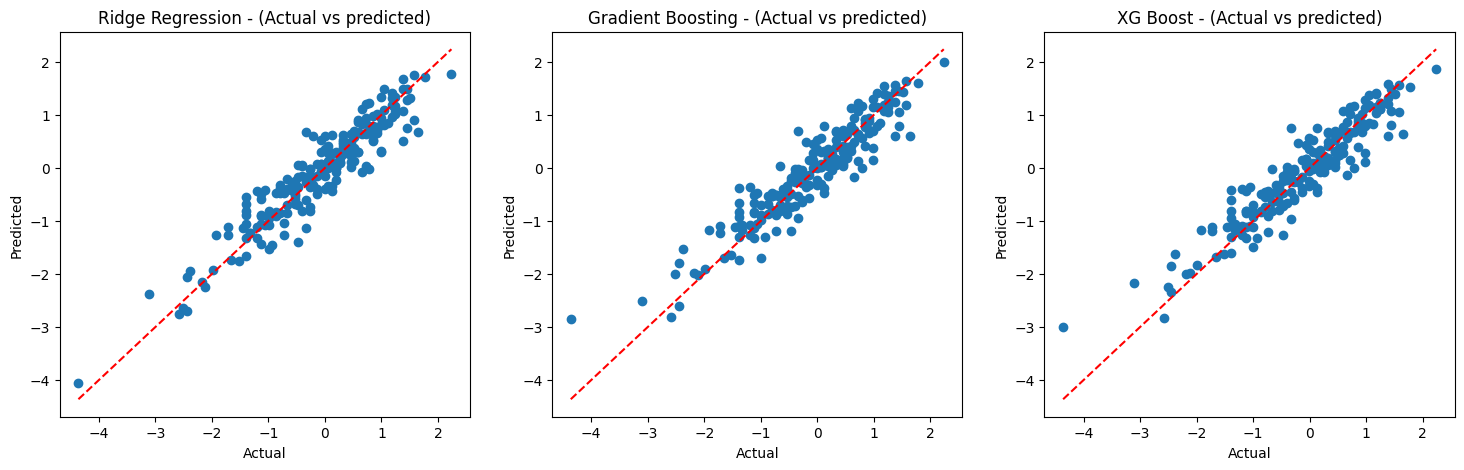

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
for ax, (name,model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
    ax.scatter(y_test, y_pred)    
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'{name} - (Actual vs predicted)')

#### Residual Plot

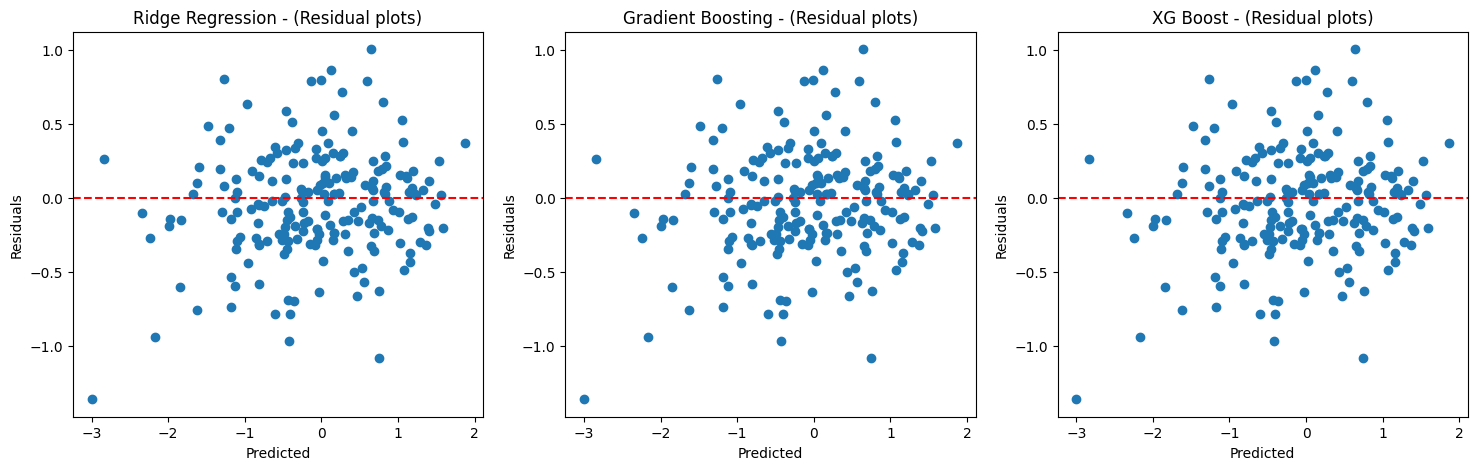

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
for ax, (name,model) in zip(axes, models.items()):
    residuals = y_test - y_pred    
    
    ax.scatter(y_pred, residuals)    
    ax.axhline(y=0, color='r', linestyle='--') 
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{name} - (Residual plots)')

In [91]:
errors=abs(y_test - y_pred)    
largest_errors=errors.sort_values(ascending=False).head(10).index
largest_errors

Index([59, 158, 521, 371, 787, 542, 265, 199, 816, 589], dtype='int64')

In [93]:
importance = pd.Series(model.coef_, index=X_train.columns).sort_values()
importance.plot(kind='barh', title='Ridge Coefficients')

AttributeError: Coefficients are not defined for Booster type None